### 1. Import the necessary libraries

In [118]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [120]:
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean,var

###  2. Read the data as a data frame

In [121]:
insurance_df = pd.read_csv(r'C:\Users\chanu\Data Science\Statistics\insurance.csv')

In [122]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [123]:
insurance_df[insurance_df['age'].between(18.5,24.9, inclusive=True)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
12,23,male,34.400,0,no,southwest,1826.84300
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
28,23,male,17.385,1,no,northwest,2775.19215
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1316,19,female,20.600,0,no,southwest,1731.67700
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733


In [124]:
insurance_df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

###  3.a. Shape of the data

In [125]:
insurance_df.shape

(1338, 7)

In [126]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### b.Data type of each attribute & c.Data type of each attribute

In [127]:
temp_df=pd.DataFrame(index=insurance_df.columns)
temp_df['datatype']=insurance_df.dtypes
temp_df['Total value']=insurance_df.count()
temp_df['Null Values']=insurance_df.isnull().sum()
temp_df['% Null Values']=insurance_df.isnull().sum()/len(insurance_df)
temp_df['Unique count']=insurance_df.nunique()
temp_df

,datatype,Total value,Null Values,% Null Values,Unique count
age,int64,1338,0,0.0,47
sex,object,1338,0,0.0,2
bmi,float64,1338,0,0.0,548
children,int64,1338,0,0.0,6
smoker,object,1338,0,0.0,2
region,object,1338,0,0.0,4
charges,float64,1338,0,0.0,1337


### d. 5 point summary of numerical attributes

In [128]:
summary_5pointdf=insurance_df.describe().transpose()
summary_5pointdf

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

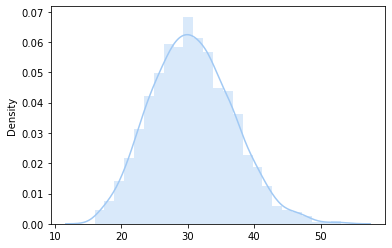

In [129]:
bmi=sns.distplot(x=insurance_df['bmi'],kde=True)

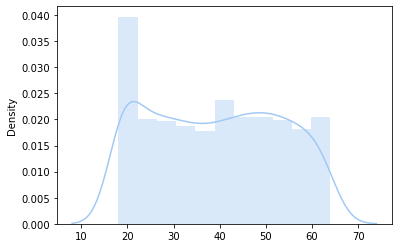

In [130]:
age=sns.distplot(x=insurance_df['age'],kde=True)

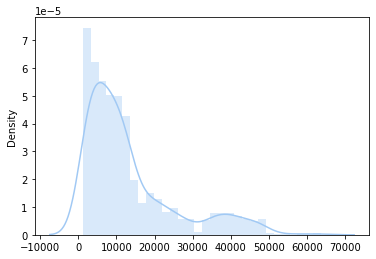

In [131]:
charges=sns.distplot(x=insurance_df['charges'],kde=True)

###  f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [132]:
skewness_df=insurance_df.skew(axis=0).to_frame().reset_index().rename(columns={'index':'description', 0:'Skewvalues'})
skewness_df['Skewnesss']=0

In [133]:
for i in range(len(skewness_df)):
    if skewness_df['Skewvalues'].between(-0.5,0.5, inclusive=True)[i]==True:
        skewness_df['Skewnesss'][i]='Symmetrical'
    elif skewness_df['Skewvalues'].between(-1,-0.5, inclusive=True)[i]==True or skewness_df['Skewvalues'].between(0.5,1, inclusive=True)[i]==True:
        skewness_df['Skewnesss'][i]='Moderately Skewed'
    else:
        skewness_df['Skewnesss'][i]='Highly Skewed'

In [134]:
skewness_df

,description,Skewvalues,Skewnesss
0,age,0.055673,Symmetrical
1,bmi,0.284047,Symmetrical
2,children,0.938380,Moderately Skewed
3,charges,1.515880,Highly Skewed


###  g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

In [135]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


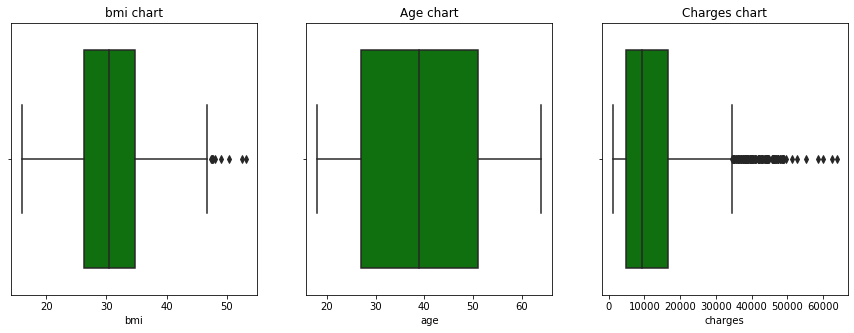

In [136]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(insurance_df['bmi'], ax=ax[0],color='green',)
sns.boxplot(insurance_df['age'], ax=ax[1],color='green')
sns.boxplot(insurance_df['charges'], ax=ax[2],color='green')
ax[0].set_title('bmi chart')
ax[1].set_title('Age chart')
ax[2].set_title('Charges chart')
plt.show()

In [137]:
num_col = []
for i in insurance_df.columns.to_list():
    if (type(insurance_df[i][0])==np.int64) | (type(insurance_df[i][0])==np.float64) == True:
        num_col.append(i)

In [138]:
cols=insurance_df._get_numeric_data().columns.to_list()

In [139]:
Q1 = insurance_df[cols].quantile(0.25)
Q3 = insurance_df[cols].quantile(0.75)
IQR = Q3 - Q1

insurance_df_cleaned = insurance_df[~((insurance_df[cols] < (Q1 - 1.5 * IQR)) |(insurance_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
insurance_df_dropped = insurance_df[((insurance_df[cols] < (Q1 - 1.5 * IQR)) |(insurance_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [140]:
summary_5pointdf_cleaned=insurance_df_cleaned.describe().transpose()
summary_5pointdf_cleaned

,count,mean,std,min,25%,50%,75%,max
age,1193.0,38.981559,14.063482,18.0000,26.0000,39.00000,51.000,64.000
bmi,1193.0,29.998529,5.866873,15.9600,25.8000,29.73500,33.770,46.750
children,1193.0,1.085499,1.216249,0.0000,0.0000,1.00000,2.000,5.000
charges,1193.0,9942.269682,7251.326564,1121.8739,4415.1588,8410.04685,12979.358,34472.841


In [141]:
summary_5pointdf

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


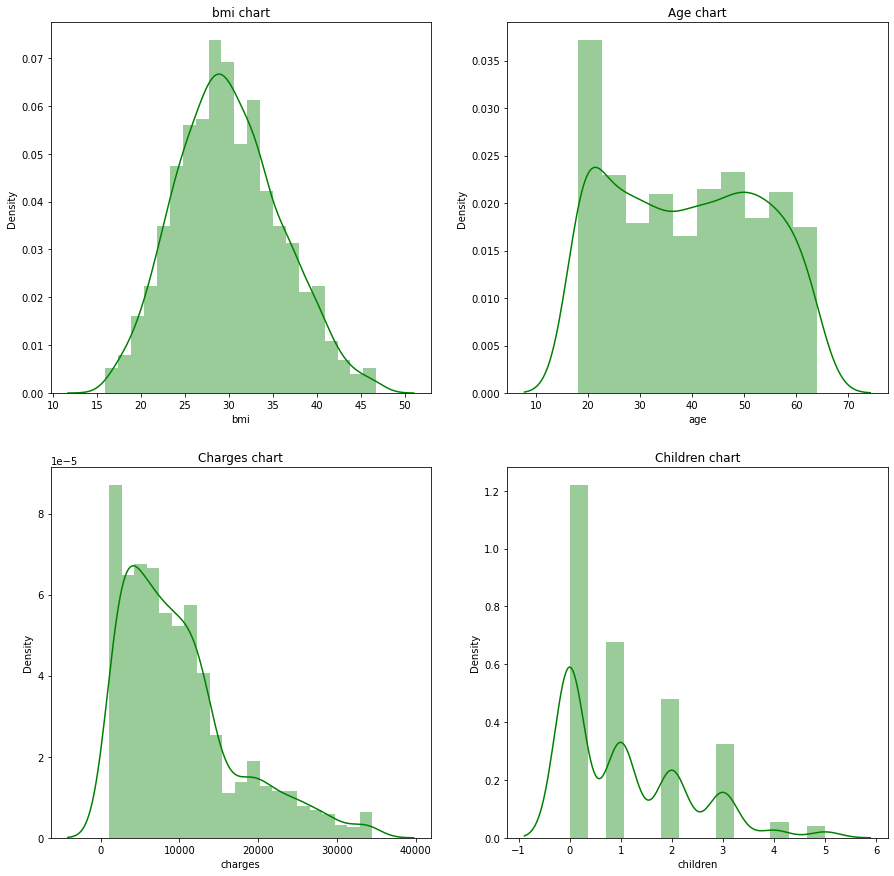

In [142]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

sns.distplot(insurance_df_cleaned['bmi'], ax=ax[0,0],color='green',)
sns.distplot(insurance_df_cleaned['age'], ax=ax[0,1],color='green')
sns.distplot(insurance_df_cleaned['charges'], ax=ax[1,0],color='green')
sns.distplot(insurance_df_cleaned['children'], ax=ax[1,1],color='green')
ax[0,0].set_title('bmi chart')
ax[0,1].set_title('Age chart')
ax[1,0].set_title('Charges chart')
ax[1,1].set_title('Children chart')
plt.show()

### i. Pair plot that includes all the columns of the data frame

In [143]:
insurance_df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [144]:
insurance_df_cleaned.corr()

,age,bmi,children,charges
age,1.000000,0.122592,0.039967,0.436815
bmi,0.122592,1.000000,0.006796,-0.061033
children,0.039967,0.006796,1.000000,0.083093
charges,0.436815,-0.061033,0.083093,1.000000


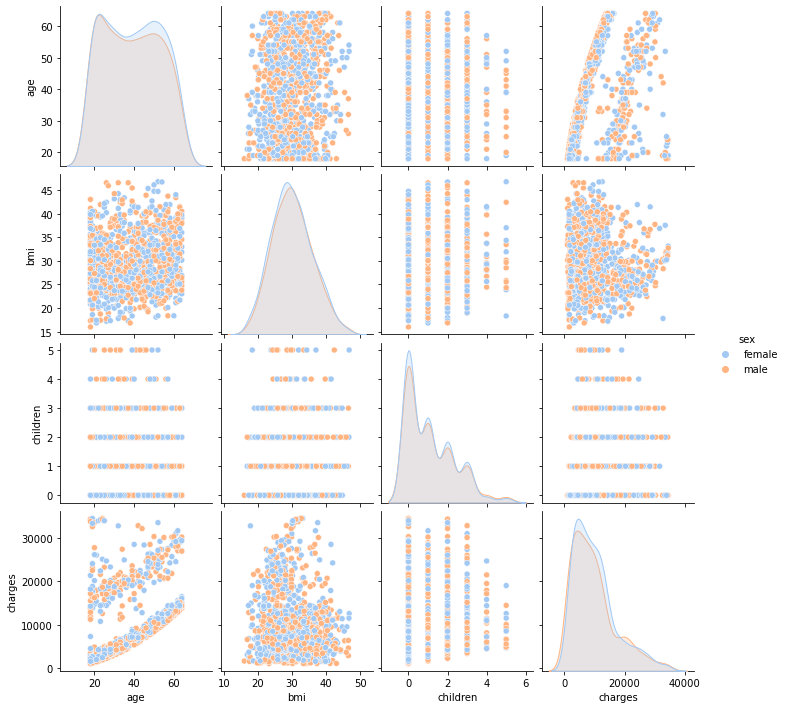

In [145]:
sns.pairplot(insurance_df_cleaned,diag_kind = 'kde',hue ='sex')
plt.show()

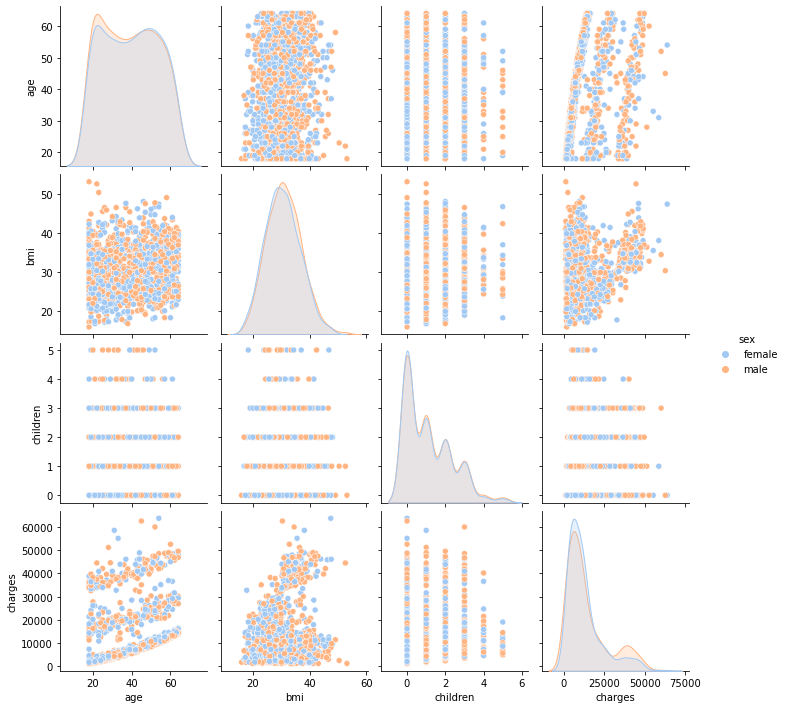

In [146]:
sns.pairplot(insurance_df,diag_kind = 'kde',hue ='sex')
plt.show()

### 4. Answer the following questions with statistical evidence 
### a. Do charges of people who smoke differ significantly from the people who don't?

In [147]:
insurance_df[insurance_df['smoker']=='yes']['charges'].mean()

32050.23183153285

In [148]:
insurance_df[~(insurance_df['smoker']=='yes')]['charges'].mean()

8434.268297856199

In [149]:
smoker_charges=round(insurance_df[insurance_df['smoker']=='yes']['charges'].mean()/insurance_df[~(insurance_df['smoker']=='yes')]['charges'].mean(),2)

In [150]:
print("people who smoke pays {} time more than the people who don't".format(smoker_charges))

people who smoke pays 3.8 time more than the people who don't


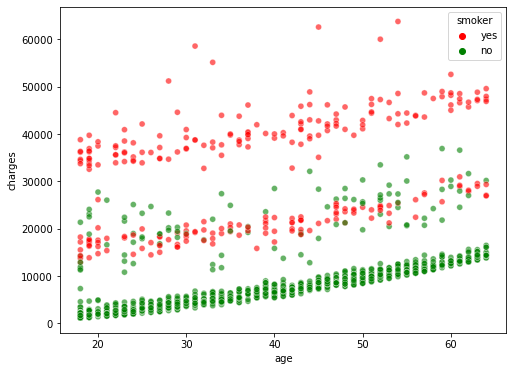

In [151]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'],alpha=0.6)
plt.show()

In [152]:
Ho='people who smoke differ significantly from the people who dont'
H1='people who smoke does not differ significantly from the people who dont'

In [153]:
Significance_value=0.95

smokers_array=np.array(insurance_df[insurance_df['smoker']=='yes']['charges'])
non_smokers_array=np.array(insurance_df[insurance_df['smoker']=='no']['charges'])

In [154]:
from statsmodels.stats.weightstats import ztest

In [155]:
z_value,p_value=ztest(smokers_array,non_smokers_array)

In [156]:
(z_value,p_value)

(46.66492117272371, 0.0)

In [157]:
if Significance_value > p_value:
    print('we reject Alternate Hypothesis, i.e. {}'.format(H1))
else:
    print('we reject null Hypothesis, i.e. {}'.format(Ho))

we reject Alternate Hypothesis, i.e. people who smoke does not differ significantly from the people who dont


#### Checking Outlier with Z values for outliers for practice

In [158]:
insurance_df1=insurance_df.copy()

In [159]:
insurance_df1=insurance_df1._get_numeric_data()
col=insurance_df1.columns.to_list()
col

['age', 'bmi', 'children', 'charges']

In [160]:
from scipy.stats import zscore

In [161]:
for i in col:
    col_zscore=i + '_zscore'
    insurance_df1[col_zscore]=zscore(insurance_df1[i],axis=0)

In [162]:
insurance_df1_zdropped=insurance_df1[((np.abs(insurance_df1['charges_zscore']>3)) | (np.abs(insurance_df1['age_zscore']>3)) | (np.abs(insurance_df1['bmi_zscore']>3)) | (np.abs(insurance_df1['children_zscore']>3)))]

In [163]:
insurance_df1_zcleaned=insurance_df1[~((np.abs(insurance_df1['charges_zscore']>3)) | (np.abs(insurance_df1['age_zscore']>3)) | (np.abs(insurance_df1['bmi_zscore']>3)) | (np.abs(insurance_df1['children_zscore']>3)))]

In [164]:
insurance_df1_zcleaned.reset_index()

,index,age,bmi,children,charges,age_zscore,bmi_zscore,children_zscore,charges_zscore
0,0,19,27.900,0,16884.92400,-1.438764,-0.453320,-0.908614,0.298584
1,1,18,33.770,1,1725.55230,-1.509965,0.509621,-0.078767,-0.953689
2,2,28,33.000,3,4449.46200,-0.797954,0.383307,1.580926,-0.728675
3,3,33,22.705,0,21984.47061,-0.441948,-1.305531,-0.908614,0.719843
4,4,32,28.880,0,3866.85520,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...,...,...,...,...,...
1304,1333,50,30.970,3,10600.54830,0.768473,0.050297,1.580926,-0.220551
1305,1334,18,31.920,0,2205.98080,-1.509965,0.206139,-0.908614,-0.914002
1306,1335,18,36.850,0,1629.83350,-1.509965,1.014878,-0.908614,-0.961596
1307,1336,21,25.800,0,2007.94500,-1.296362,-0.797813,-0.908614,-0.930362


### b. Does bmi of males differ significantly from that of females?

In [165]:
Ho = "Gender has no effect on bmi"   
H1 = "Gender has an effect on bmi"

In [166]:
Significance_value=0.05

In [167]:
male_bmi_array=np.array(insurance_df[insurance_df['sex']=='male']['bmi'])
female_bmi_array=np.array(insurance_df[insurance_df['sex']=='female']['bmi'])

In [168]:
insurance_df[insurance_df['sex']=='male']['bmi']

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

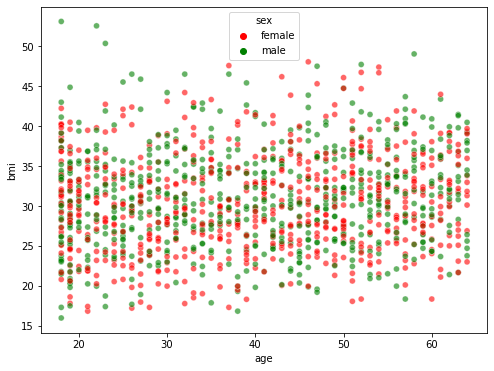

In [169]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.bmi,hue=insurance_df.sex,palette= ['red','green'],alpha=0.6)
plt.show()

There is no significance difference in the BMI values of males and female

In [170]:
z_value,p_value=ztest(male_bmi_array,female_bmi_array)

In [171]:
p_value

0.08974343679943912

In [172]:
if  Significance_value<p_value:
    print('we reject Alternate Hypothesis, i.e. {}'.format(H1))
else:
    print('we reject null Hypothesis, i.e. {}'.format(Ho))

we reject Alternate Hypothesis, i.e. Gender has an effect on bmi


### Is the proportion of smokers significantly different in different genders?

In [173]:
crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker']) 

In [174]:
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [175]:
Ho = "Gender has no effect on smoking habits"  
H1 = "Gender has an effect on smoking habits" 

In [176]:
Significance_value=0.05

In [177]:
from scipy.stats import chi2_contingency

In [178]:
stat, p_value, dof, expected = chi2_contingency(crosstab)

In [179]:
if  Significance_value<p_value:
    print('we reject Alternate Hypothesis, i.e. {}'.format(H1))
else:
    print('we reject null Hypothesis, i.e. {}'.format(Ho))

we reject null Hypothesis, i.e. Gender has no effect on smoking habits


### d. Is the distribution of bmi across women with no children, one child and two children, the same? 

In [180]:
Ho = "No. of children has no effect on bmi"   
H1 = "No. of children has an effect on bmi"

In [181]:
insurance_df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [183]:
nochild_array=np.array(insurance_df[insurance_df['children']==0]['bmi'])
onechild_array=np.array(insurance_df[insurance_df['children']==1]['bmi'])
twochild_array=np.array(insurance_df[insurance_df['children']==2]['bmi'])

In [184]:
bmi_children_df=insurance_df[insurance_df['children'].isin([0,1,2])]

In [185]:
current_palette = sns.color_palette()

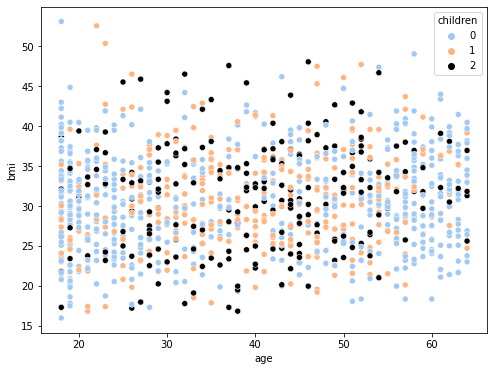

In [186]:
plt.figure(figsize=(8,6))
sns.scatterplot(bmi_children_df.age, bmi_children_df.bmi,hue=bmi_children_df.children,palette=["C0", "C1", "k"])
plt.show()

In [187]:
from scipy.stats import stats

In [188]:
s, p_value=stats.f_oneway(nochild_array,onechild_array,twochild_array)

In [189]:
if  Significance_value<p_value:
    print('we reject Alternate Hypothesis, i.e. {}'.format(H1))
else:
    print('we reject null Hypothesis, i.e. {}'.format(Ho))

we reject Alternate Hypothesis, i.e. No. of children has an effect on bmi
